## Ejercicio 1: Preprocesamiento
- Grafique el comportamiento distributivo de los atributos y de la variable dependiente. Reporte brevemente el comportamiento de las variables.
- En base al comportamiento de los atributos, considere si es necesario implementar alguna recodificación o transformación de atributo. Algunas normas a seguir:
    - Para las variables categóricas, recodifíquelas en variables binarias.
    - Para aquellas variables numéricas que presenten alto sesgo, pueden transformarlas con su logaritmo.


In [2]:
#importamos las librerias basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
#importamos los datasets
df_train = pd.read_csv('churn_train.csv').drop('Unnamed: 0', axis=1)
df_test = pd.read_csv('churn_test.csv').drop('Unnamed: 0', axis=1)

In [6]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls           

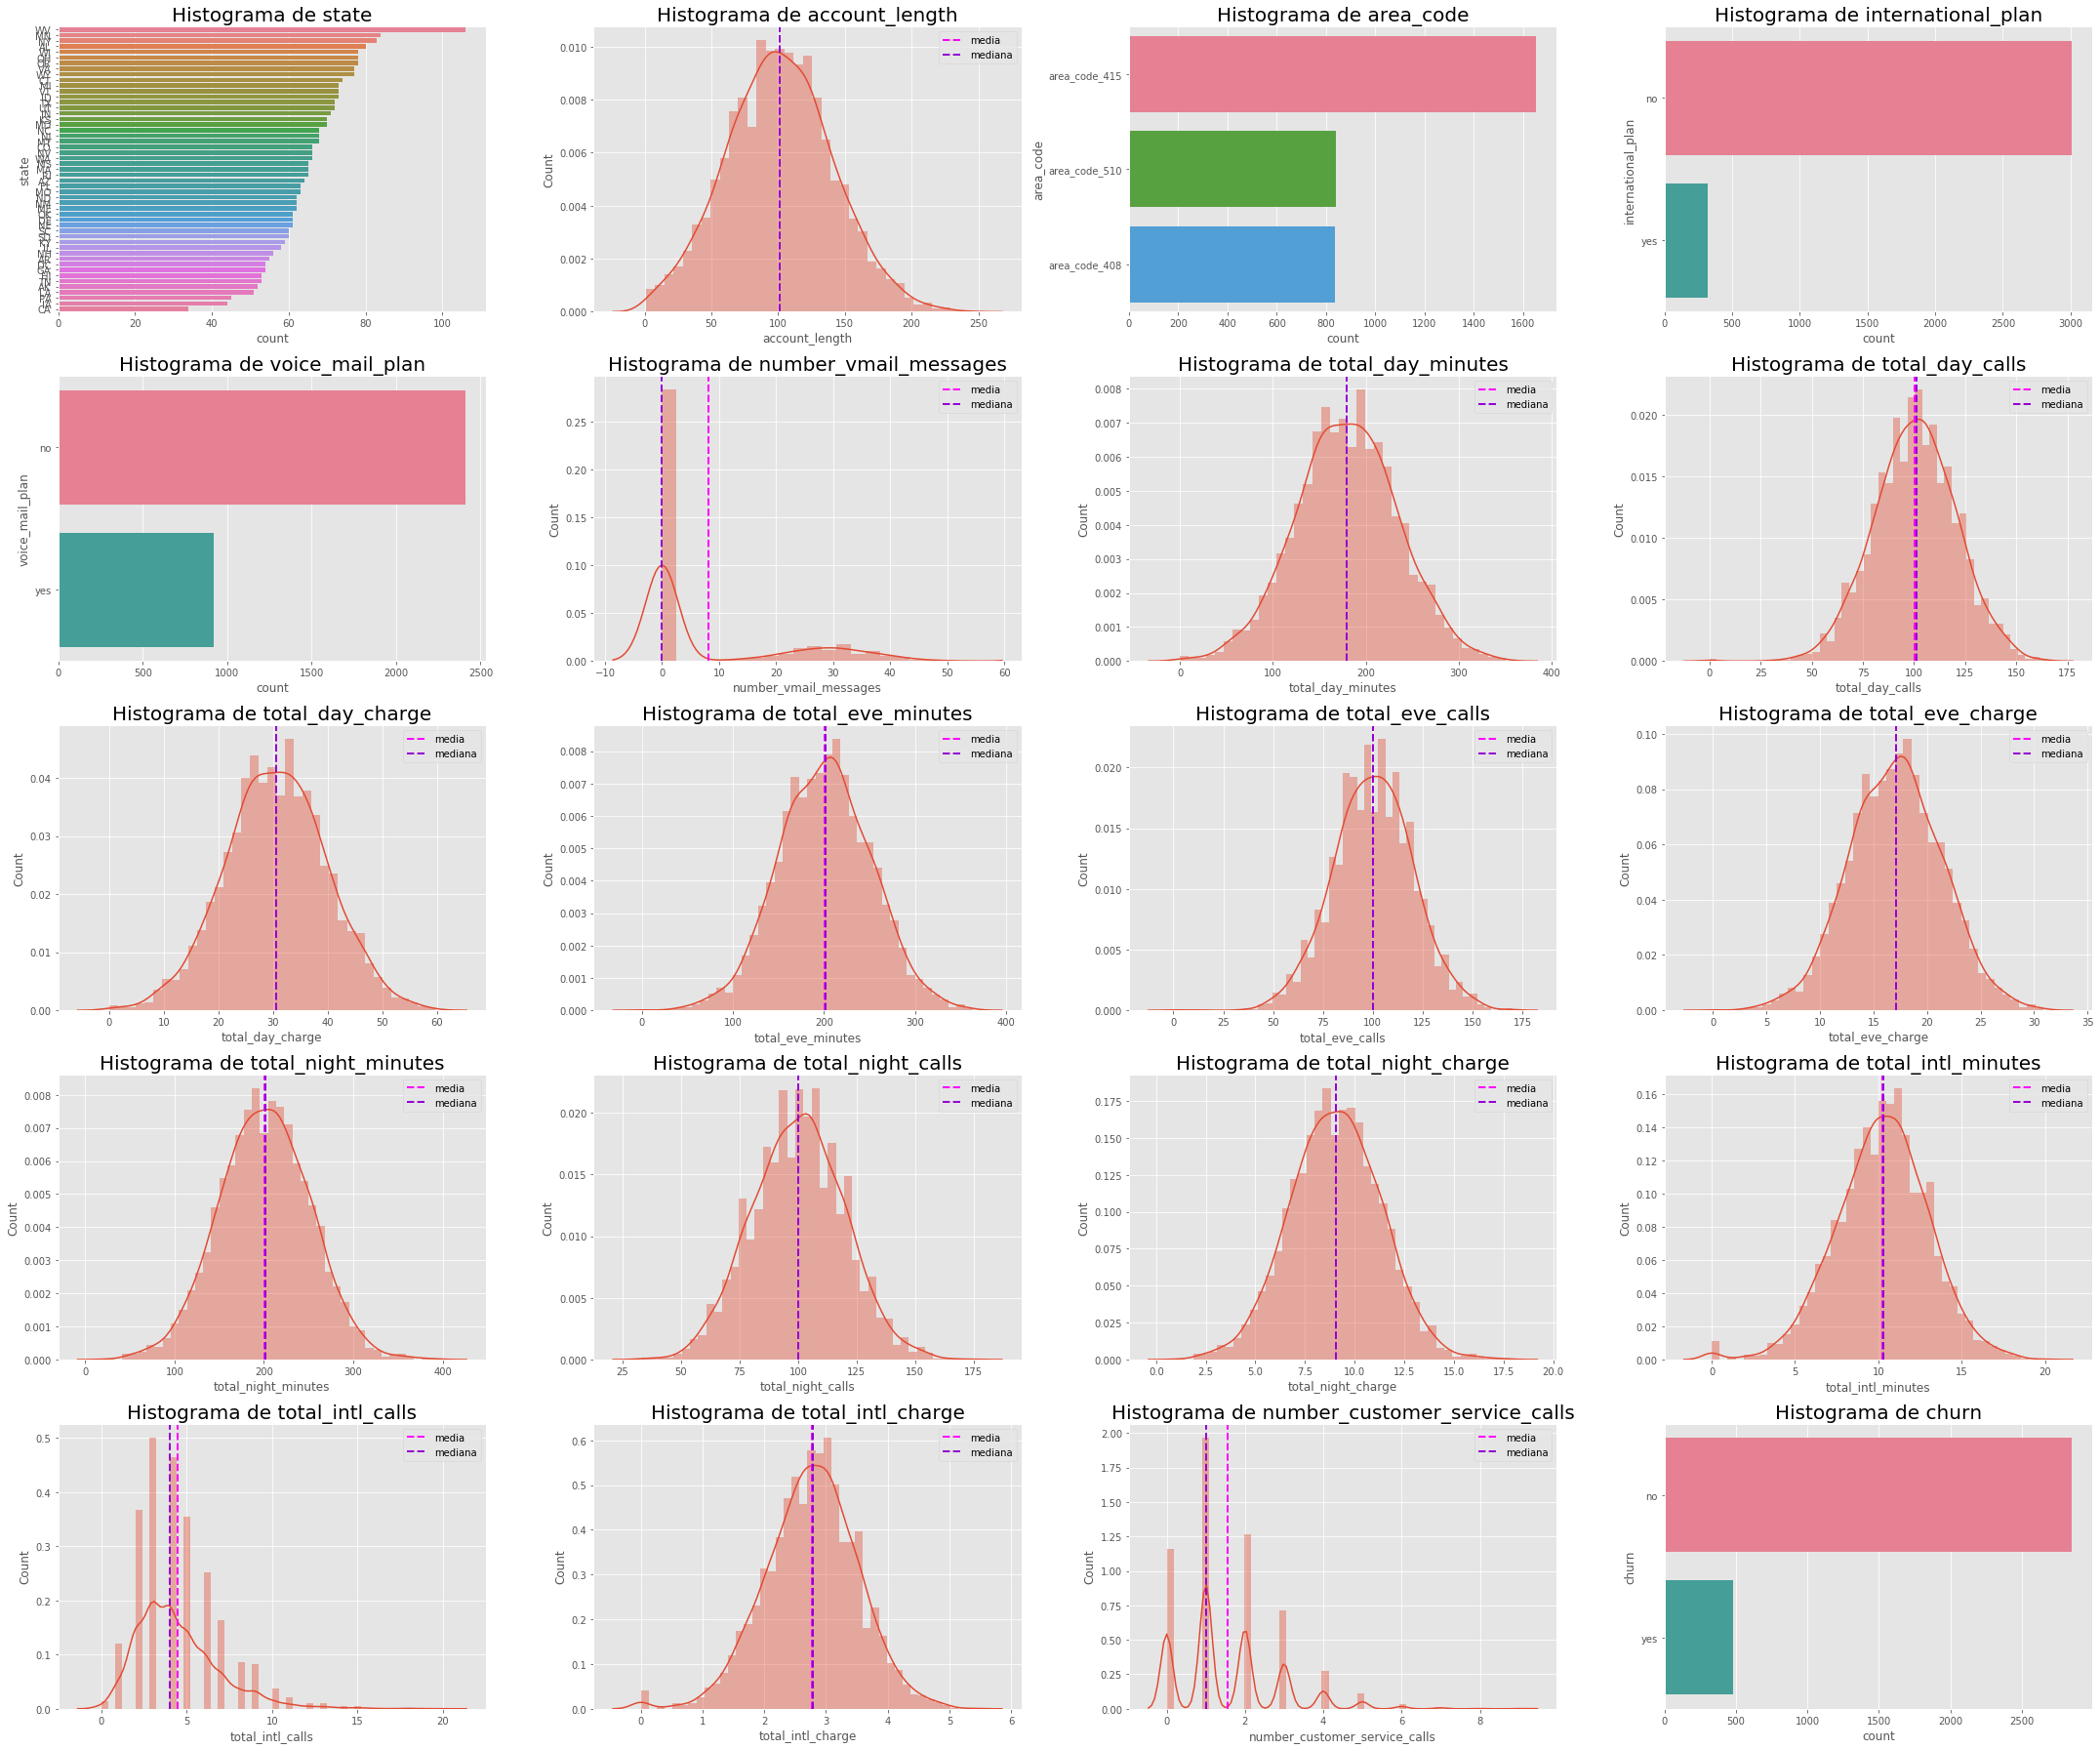

In [10]:

plt.figure(figsize=(30,25))
rows = 5; cols = df_train.shape[1]/rows
   
for index, (colname, serie) in enumerate (df_train.iteritems()):
    plt.subplot(rows, cols, index + 1)
    
    if serie.dtype == 'int64' or serie.dtype == 'float64':
        sns.distplot(serie, kde=True)# kde es la curva
        plt.axvline(np.mean(serie), color='magenta',linestyle='--', label = "media", lw=2)
        plt.axvline(np.median(serie), color='darkviolet', linestyle='--', label='mediana', lw=2)
        plt.title('Histograma de {}'.format(colname), fontsize=20)
        plt.xlabel(colname)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.legend()
    
    else:
        sns.countplot(y = serie, order = serie.value_counts().index, palette="husl") 
        plt.title('Histograma de {}'.format(colname), fontsize=20)

In [12]:
# creamos un nueva variable donde guardaremos las variables tipo objeto
variable_objeto = []

for colname, serie in df_train.iteritems():
    if serie.dtype =='O':
        variable_objeto.append(colname)
    
variable_objeto

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [14]:
# generamos un nuevo objeto con variables dummies
df_dummy = pd.get_dummies(df_train,prefix=variable_objeto,prefix_sep='_',drop_first=True, dummy_na=False)

In [15]:
df_dummy.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,1,0,0,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,1,0,0,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,1,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,1,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,1,0,1,0,0


# Ejercicio 2: Comparación de AdaBoost y Gradient Boosting

Entrene los clasificadores AdaBoost y Gradient Boosting para mejorar su capacidad predictiva
en la medida de lo posible. Para ello, implemente una búsqueda de grilla con las siguientes
especificaciones:

* AdaBoostClassifier : {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}
* GradientBoostingClassifier: {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000], 'subsample': [0.1,0.5,0.9]}
* Si el tiempo de computación es alto, puede implementar la búsqueda con 1 validación cruzada.
* Reporte las métricas para los mejores modelos.

In [16]:
df_dummy.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_WI', '

### AdaBoostClassifier

In [17]:
from sklearn.model_selection import GridSearchCV

# definimos los parametros: max_depth:con una profundidad de ramas hasta 32, max_features: evaluando todos los atributos en la matriz

grid_ada = GridSearchCV(AdaBoostClassifier(random_state=2378),                                
                                # param_grid colocamos los parametros definidos anteriormente
                                param_grid={'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000]},                                
                                cv=5, n_jobs=-1).fit(x_mat_train, y_vec_train)


NameError: name 'x_mat_train' is not defined